# MAS.S60  Homework 2 : Demo for "First Order Motion Model for Image Animation"

In this assignment we will create a generative video using First Order Model, which you already learned about from the previous lecture by the creator of this algorithm, Aliaksandr Siarohin.



<div class="alert alert-block alert-info" style="text-align: center;">
<a href="https://colab.research.google.com/github/mitmedialab/MAS.S60.Fall2020/blob/master/homework/HW0%20-%20Warmup.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</div>



**Clone repository and install all the requirments***

In [ ]:
!git clone https://github.com/AliaksandrSiarohin/first-order-model

fatal: destination path 'first-order-model' already exists and is not an empty directory.


In [ ]:
from IPython.display import HTML
from IPython.display import Image
from base64 import b64encode

**Open the repository and download example files**


In [ ]:
!cd first-order-model

In [ ]:
#download target image
url = 'https://github.com/mitmedialab/MAS.S60.Fall2020/blob/master/homework/hw2-files/monalisa.png?raw=true'
r = requests.get(url, allow_redirects=True)
open('monalisa.png', 'wb').write(r.content)

168285

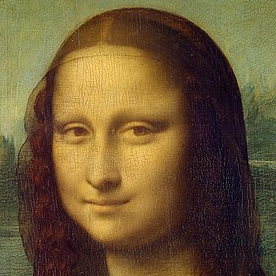

In [ ]:
Image('/content/first-order-model/monalisa.png')

In [ ]:
#download driving video
import requests

url = 'https://github.com/mitmedialab/MAS.S60.Fall2020/blob/master/homework/hw2-files/template_clip.mp4?raw=true'
r = requests.get(url, allow_redirects=True)

open('template_clip.mp4', 'wb').write(r.content)

642264

In [ ]:
#show driving video
mp4 = open('/content/first-order-model/template_clip.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)

**Model Downloading**


In [ ]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=19d9ZJYAMsNNQZd4AzIWCw4sF1EaNYuJ3&export=download'
output = 'vox-cpk.pth.tar'
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/u/0/uc?id=19d9ZJYAMsNNQZd4AzIWCw4sF1EaNYuJ3&export=download
To: /content/first-order-model/vox-cpk.pth.tar
729MB [00:10, 69.4MB/s]


'vox-cpk.pth.tar'

In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='/content/first-order-model/vox-cpk.pth.tar')

**The Visualization function**


In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

source_image = imageio.imread('/content/first-order-model/monalisa.png')
driving_video = imageio.mimread('/content/first-order-model/template_clip.mp4')


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

def display_only_output(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = []
        #cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

def display_output_and_original(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = []
        cols.append(driving[i])
        #cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

## Running on your data

**First we need to crop a face from both source image and video, while simple graphic editor like paint can be used for cropping from image. Cropping from video is more complicated. You can use ffpmeg for this.**

*If you get an error warning for using your own driving video, sometimes it is because your video has some issue in the first or last frame that makes the algorithm unable to read them. Please use this https://online-video-cutter.com/ to trim the first/last few seconds of your video.

*The driving video should have the person's mouth close in the first frame of the video (this serves as the calibration pose for the algorithm)

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte


source_image = imageio.imread('/content/first-order-model/monalisa.png')
driving_video = imageio.mimread('/content/first-order-model/template_clip.mp4', memtest=False)


#Resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=False)

HTML(display(source_image, driving_video, predictions).to_html5_video())


100%|██████████| 148/148 [00:05<00:00, 27.22it/s]


In [ ]:
HTML(display_only_output(source_image, driving_video, predictions).to_html5_video())

**Now Let's make something walk!**

In [141]:
#download target image
url = 'https://github.com/mitmedialab/MAS.S60.Fall2020/blob/master/homework/hw2-files/target_dinosaur.png?raw=true'
r = requests.get(url, allow_redirects=True)
open('target_dinosaur.png', 'wb').write(r.content)

322308

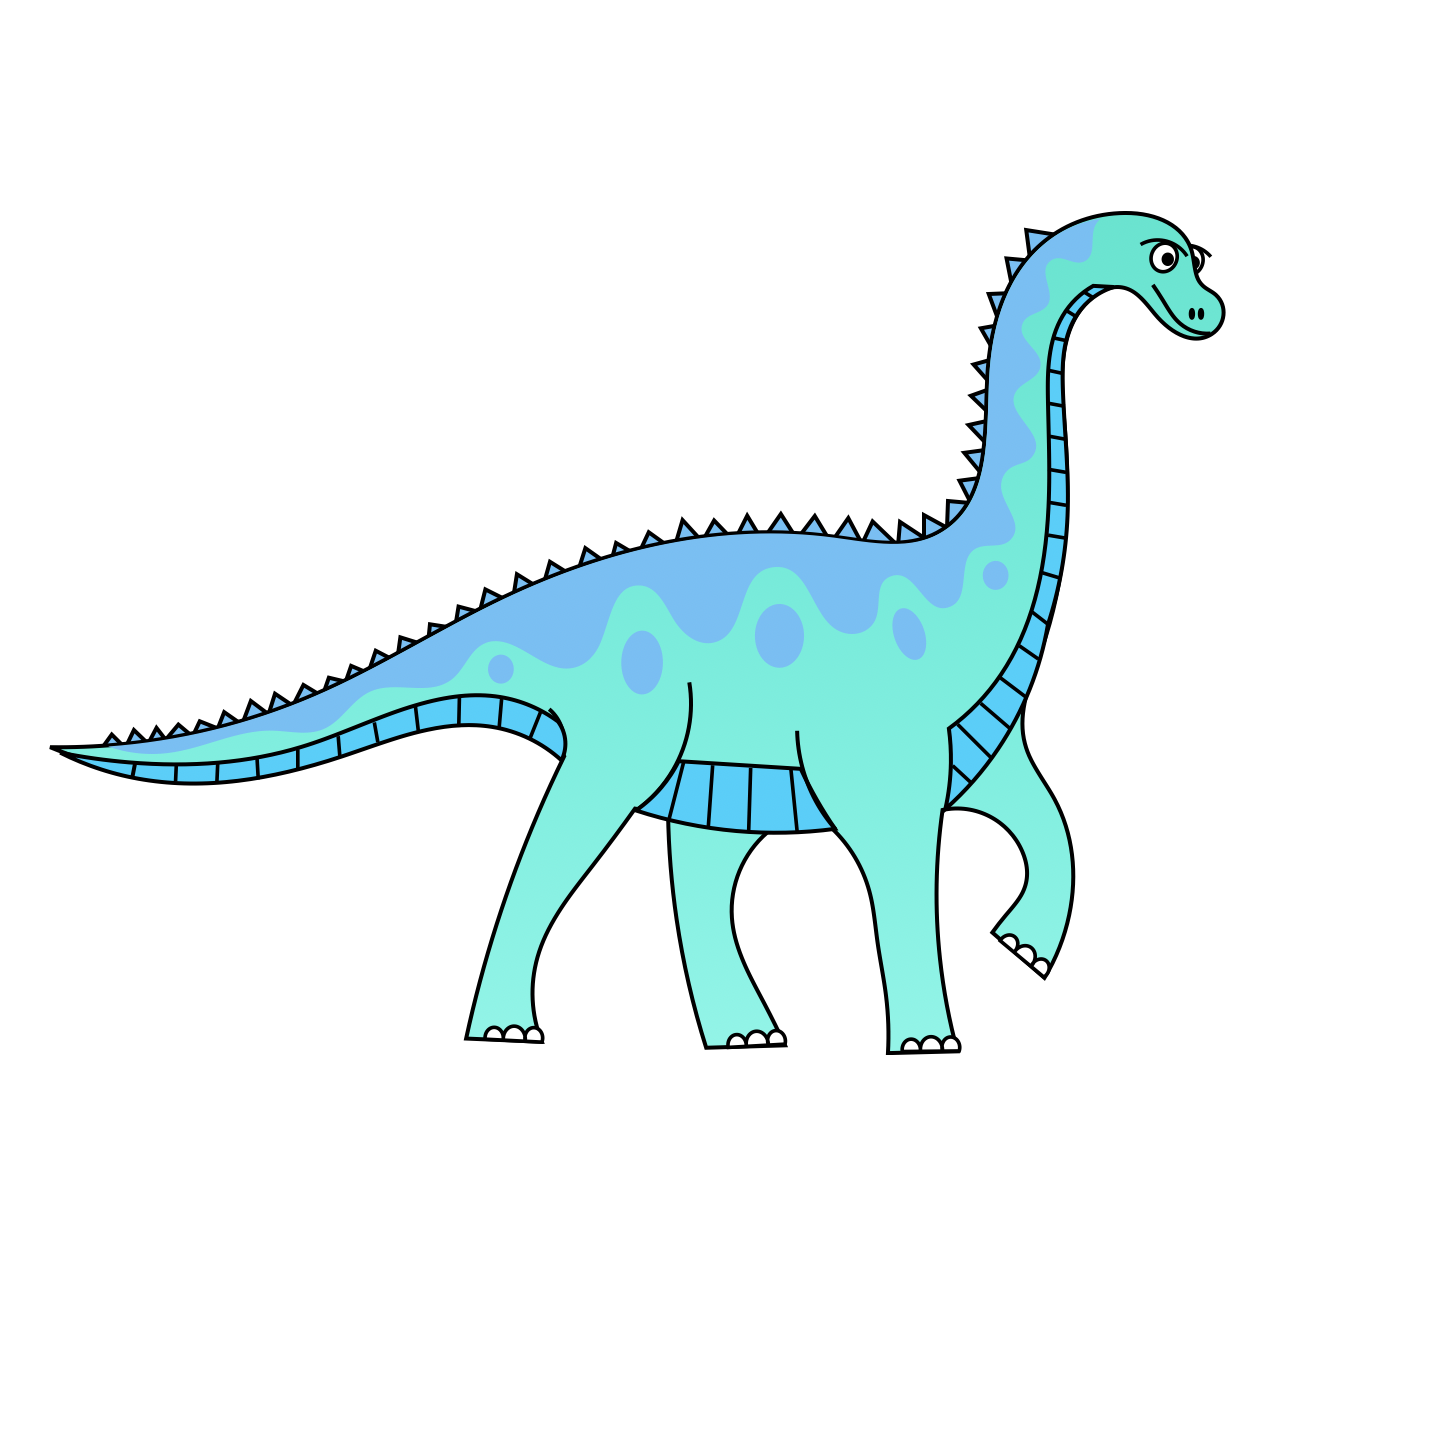

In [142]:
Image('/content/first-order-model/target_dinosaur.png')

In [144]:
#download driving video
import requests

url = 'https://github.com/mitmedialab/MAS.S60.Fall2020/blob/master/homework/hw2-files/driving_house.mp4?raw=true'
r = requests.get(url, allow_redirects=True)

open('driving_house.mp4', 'wb').write(r.content)

176526

In [145]:
#show driving video
mp4 = open('/content/first-order-model/driving_house.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)

In [131]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=1_kb_on_hSM1a2ESL8O38pxT2xzN-7lkD'
output = 'mgif-cpk.pth.tar'
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/u/0/uc?id=1_kb_on_hSM1a2ESL8O38pxT2xzN-7lkD
To: /content/first-order-model/mgif-cpk.pth.tar
750MB [00:12, 60.3MB/s]


'mgif-cpk.pth.tar'

In [132]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/mgif-256.yaml', 
                            checkpoint_path='/content/first-order-model/mgif-cpk.pth.tar')

In [146]:
from demo import make_animation
from skimage import img_as_ubyte


source_image = imageio.imread('/content/first-order-model/target_dinosaur.png')
driving_video = imageio.mimread('/content/first-order-model/driving_house.mp4', memtest=False)


#Resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=False)

HTML(display(source_image, driving_video, predictions).to_html5_video())


100%|██████████| 128/128 [00:04<00:00, 27.40it/s]
